## Importing modules

* Dataset Information
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:-

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm
species: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
url = 'https://raw.githubusercontent.com/aswintechguy/Machine-Learning-Projects/master/Iris%20dataset%20analysis%20-%20Classification/Iris.csv'
df = pd.read_csv(url)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
df =  df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
# display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
# df.info()
#to display no of samples for each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [24]:
#check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Data Analysis

<Axes: >

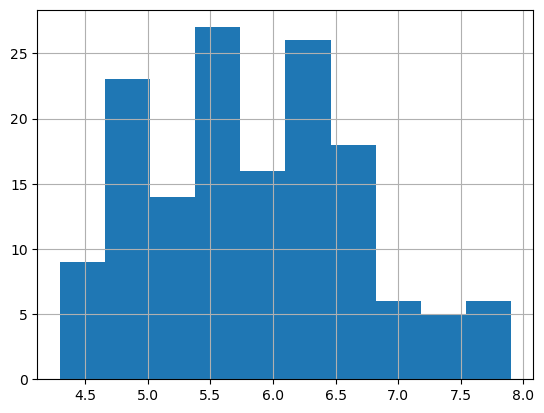

In [26]:
df['SepalLengthCm'].hist()

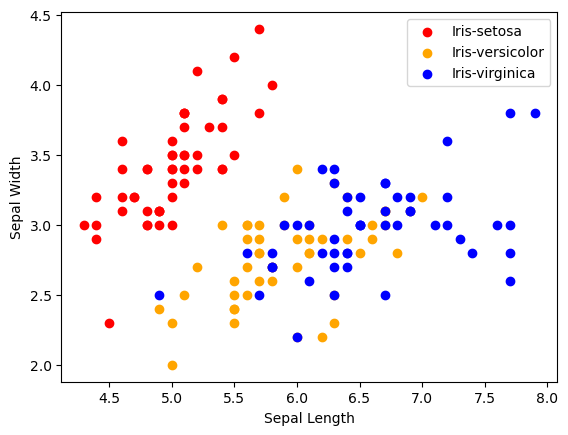

In [32]:
#scatter plot
colors = ['red', 'orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']


for i in range(3):
    x = df[df.Species == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'],c = colors[i] , label= species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
#to display the classes
plt.legend()

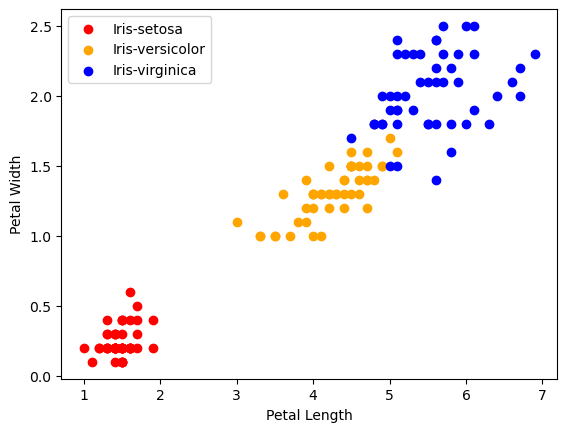

In [33]:
for i in range(3):
    x = df[df.Species == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'],c = colors[i] , label= species[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
#to display the classes
plt.legend()

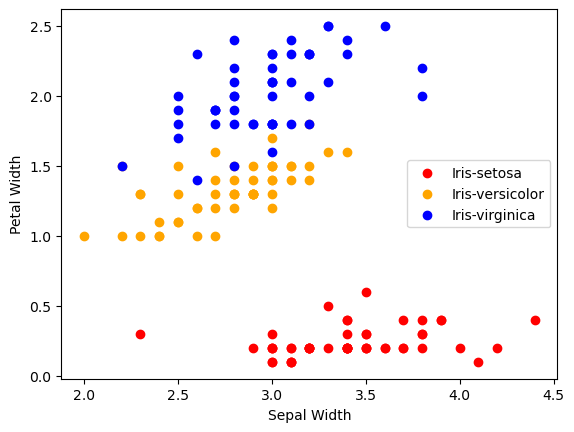

In [37]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

## Coorelation Matrix
*  
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [54]:
# Remove the species column from your feature set (X) 
# since it contains non-numeric values.
# df.drop('Species',axis=1, inplace=True)
# df.corr()

#Converting the labels to numeric form 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Training

In [55]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [67]:

# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [68]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777
